In [ ]:
import pandas as pd
import numpy as np
from scipy import optimize
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import random

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/datast_6.csv')

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/laboratorios/dataset_6.csv')

In [ ]:
y_train = df_train['label']
X_train = df_train.drop(columns=['label'])

y_test = df_test['label']
X_test = df_test.drop(columns=['label'])

In [ ]:
# Normalizar dividiendo entre 255
X_train_n = X_train / 255.0
X_test_n = X_test / 255.0

print(X_train_n)
print('-'*30)
print(X_test_n)

       pixel1  pixel2  pixel3    pixel4    pixel5  pixel6  pixel7    pixel8  \
0         0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   
1         0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   
2         0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.019608   
3         0.0     0.0     0.0  0.003922  0.007843     0.0     0.0  0.000000   
4         0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   
...       ...     ...     ...       ...       ...     ...     ...       ...   
59995     0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   
59996     0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   
59997     0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   
59998     0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   
59999     0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   

       pixel9  pixel10  ...  pixel775  pixel776  pi

In [ ]:
from sklearn.cluster import KMeans

# Definir el número de clusters
k = 10

# Crear el objeto KMeans
kmeans = KMeans(n_clusters=k, random_state=42)

# Predecir los clusters para los datos normalizados X_train_n
y_pred_test = kmeans.fit_predict(X_test_n)

print(y_pred_test)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2 4 7 ... 9 3 3]


In [ ]:
from sklearn.metrics import adjusted_rand_score

# Calcular el ARI entre las etiquetas reales y las etiquetas predichas por K-Means
ari = adjusted_rand_score(y_test, y_pred_test)
#La función adjusted_rand_score compara estas dos asignaciones de grupos y devuelve un valor que varía entre -1 y 1.
#Un valor cercano a 1 indica una asignación de grupos similar entre las etiquetas reales
#y las predichas, mientras que un valor cercano a 0 o negativo indica una asignación aleatoria.

print("Adjusted Rand Index (ARI):", ari)

Adjusted Rand Index (ARI): 0.3434697841665676


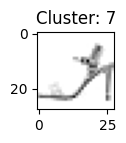

In [ ]:
import matplotlib.pyplot as plt

# Se obtiene la fila específica que deseas imprimir (por ejemplo, fila 520)
fila_a_imprimir = X_test.iloc[520]

# Se obtiene las características de la fila como un array numpy
data = fila_a_imprimir.values

# Reorganizar los datos en una matriz 28x28 para representar la imagen
image_data = data.reshape(28, 28)

# Configurar el tamaño de la figura
plt.figure(figsize=(1, 1))

# Mostrar la imagen
plt.imshow(image_data, cmap='binary')

# Mostrar el número de cluster (valor de predicción)
valor_prediccion = y_pred_test[520]  # Suponiendo que y_pred_test es un array NumPy o una lista
plt.title(f'Cluster: {valor_prediccion}')  # Agregar el número de cluster como título

plt.show()

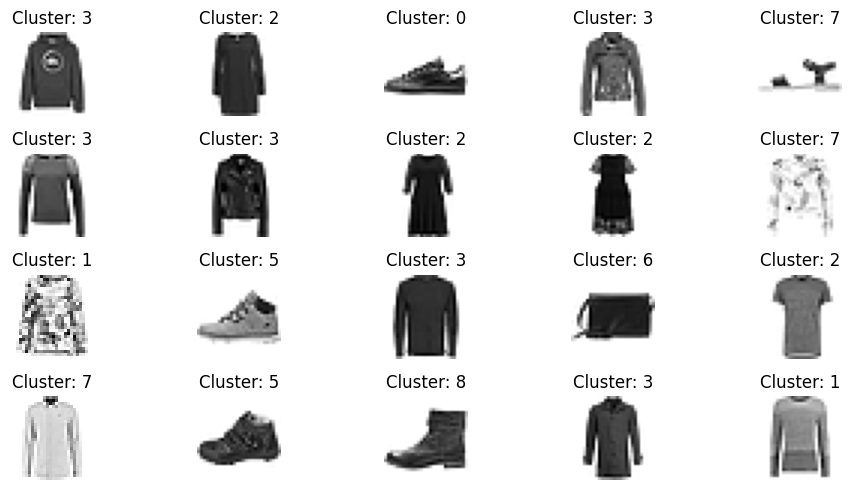

In [ ]:
# Obtener 20 índices aleatorios dentro del rango de predicciones_df2
indices_aleatorios = random.sample(range(len(y_pred_test)), 20)

# Configurar el tamaño de la figura para mostrar varias imágenes
plt.figure(figsize=(10, 5))

# Iterar sobre los índices aleatorios
for i, idx in enumerate(indices_aleatorios):
    # Obtener la fila específica que deseas imprimir
    fila_a_imprimir = X_test.iloc[idx]  # Utilizamos X_test en lugar de X_test2
    # Obtener las características de la fila como un array numpy
    data = fila_a_imprimir.values
    # Reorganizar los datos en una matriz 28x28 para representar la imagen
    image_data = data.reshape(28, 28)

    # Mostrar la imagen en una subfigura
    plt.subplot(4, 5, i + 1)
    plt.imshow(image_data, cmap='binary')
    plt.axis('off')  # Deshabilitar los ejes
    valor_prediccion = y_pred_test[idx]  # Utilizamos y_pred_test en lugar de predicciones_df2
    plt.title(f'Cluster: {valor_prediccion}')  # Añadir el número de cluster como título

plt.tight_layout()  # Ajustar el diseño de las subfiguras
plt.show()

In [ ]:
kmeans.cluster_centers_

array([[ 9.95263713e-21, -1.01643954e-19,  1.70761842e-18, ...,
         3.46944695e-17, -1.47451495e-17,  4.33680869e-19],
       [ 3.16000695e-06,  1.26400278e-05,  1.54840341e-04, ...,
         1.13760250e-02,  2.69232592e-03,  3.53920779e-04],
       [ 9.31736242e-21,  5.77147978e-05,  1.91370119e-04, ...,
         5.77147978e-04,  1.82257256e-05, -2.00577402e-18],
       ...,
       [ 1.18584613e-20,  3.05418117e-06,  4.58127176e-05, ...,
         1.11569238e-02,  3.38708692e-03,  3.63447560e-04],
       [-4.44692297e-21, -8.80914265e-20,  8.13151629e-19, ...,
         4.13634013e-02,  1.54158215e-02,  1.78180806e-03],
       [ 1.93657710e-05,  2.61437908e-04,  1.20067780e-03, ...,
         4.09682885e-02,  1.50278383e-02,  1.92689421e-03]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


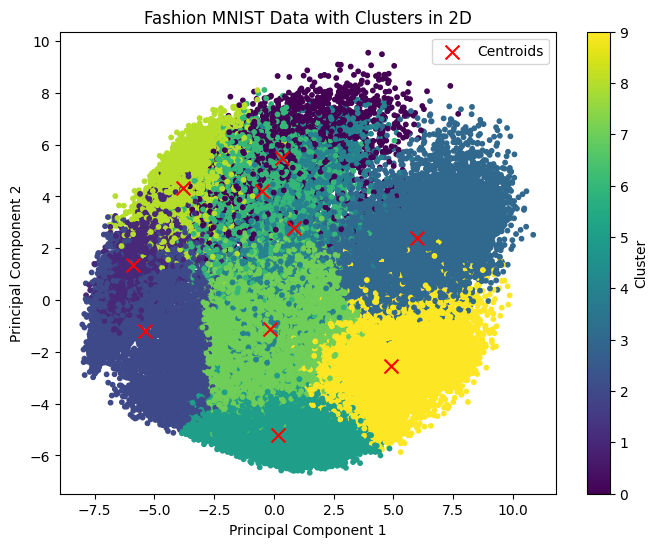

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

def plot_data_2d_with_clusters(X, n_clusters=10):
    # Reducción de dimensionalidad a 2D
    pca = PCA(n_components=2)
    X_2d = pca.fit_transform(X)

    # Ajustar el modelo de clustering (KMeans)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)

    # Obtener las etiquetas de cluster asignadas a cada punto
    cluster_labels = kmeans.labels_

    # Dibujar los puntos de datos con colores según el cluster al que pertenecen
    plt.figure(figsize=(8, 6))
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=cluster_labels, cmap='viridis', s=10)
    plt.colorbar(label='Cluster')

    # Dibujar los centroides
    centroids_2d = pca.transform(kmeans.cluster_centers_)
    plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], marker='x', c='red', s=100, label='Centroids')

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Fashion MNIST Data with Clusters in 2D')
    plt.legend()

# Suponiendo que X_train_n es tu conjunto de datos de entrenamiento
plot_data_2d_with_clusters(X_train_n)
plt.show()


In [ ]:
    #Utiliza np.random.choice para seleccionar aleatoriamente índices de muestras del conjunto de datos X
    # La función np.random.choice toma tres argumentos: el tamaño del conjunto de datos, el tamaño del lote y si se permite la repetición de muestras
    # En este caso, replace=False asegura que las muestras seleccionadas no se repitan
def load_next_batch(batch_size):
    return X_train[np.random.choice(len(X_train), batch_size, replace=False)]
     # Selecciona las muestras correspondientes a los índices aleatorios del conjunto de datos X y las devuelve como el lote


In [ ]:
from sklearn.cluster import MiniBatchKMeans

# Definición de parámetros
k = 10
n_init = 10
n_iterations = 100
batch_size = 100
init_size = 500
evaluate_on_last_n_iters = 10

# Mejor modelo MiniBatchKMeans encontrado hasta ahora
best_kmeans = None

# Bucle sobre las inicializaciones aleatorias
for init in range(n_init):
    # Inicializa un objeto MiniBatchKMeans
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size)

    # Carga un lote de datos para la inicialización actual
    X_init = load_next_batch(init_size)

    # Ajusta parcialmente el modelo MiniBatchKMeans a este lote
    minibatch_kmeans.partial_fit(X_init)

    # Inicializa la suma de inercia del modelo
    minibatch_kmeans.sum_inertia_ = 0

    # Bucle sobre las iteraciones
    for iteration in range(n_iterations):
        # Carga un lote de datos para esta iteración
        X_batch = load_next_batch(batch_size)

        # Ajusta parcialmente el modelo MiniBatchKMeans a este lote
        minibatch_kmeans.partial_fit(X_batch)

        # Si estamos en las últimas iteraciones, suma la inercia
        if iteration >= n_iterations - evaluate_on_last_n_iters:
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_

    # Compara la inercia del modelo actual con el mejor encontrado hasta ahora
    if (best_kmeans is None or
        minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
        # Actualiza el mejor modelo encontrado hasta ahora
        best_kmeans = minibatch_kmeans


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: 

In [ ]:
# Calcula la inercia del mejor modelo MiniBatchKMeans encontrado
best_kmeans.inertia_


-1184.485624909312

In [ ]:
from sklearn.metrics import silhouette_score

# Calcula el coeficiente de silhouette para evaluar la calidad del clustering
# silhouette_score toma dos argumentos: los datos X y las etiquetas de cluster asignadas por el algoritmo KMeans
silhouette_score(X_train, kmeans.labels_)

0.7698222322297206

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

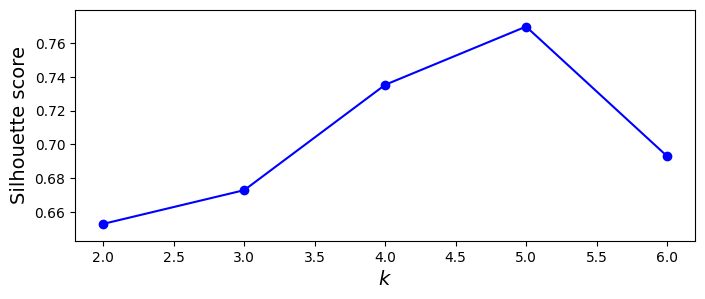

In [ ]:
from sklearn.metrics import silhouette_score

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_train) for k in range(2, 7)]  # Rango
silhouette_scores = [silhouette_score(X_train, model.labels_) for model in kmeans_per_k]  # Eliminado [1:]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 7), silhouette_scores, "bo-")  # Rango
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)

# Ajustar los límites del eje x e y para mostrar todos los datos
plt.axis([1.8, 6.2, min(silhouette_scores) - 0.01, max(silhouette_scores) + 0.01])  # Cambio en los límites del eje x

plt.show()



También es muy útil visualizar los diagramas de silueta, en el que visualizaremos todos los coeficientes de silueta ordenados por grupos y su valor.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

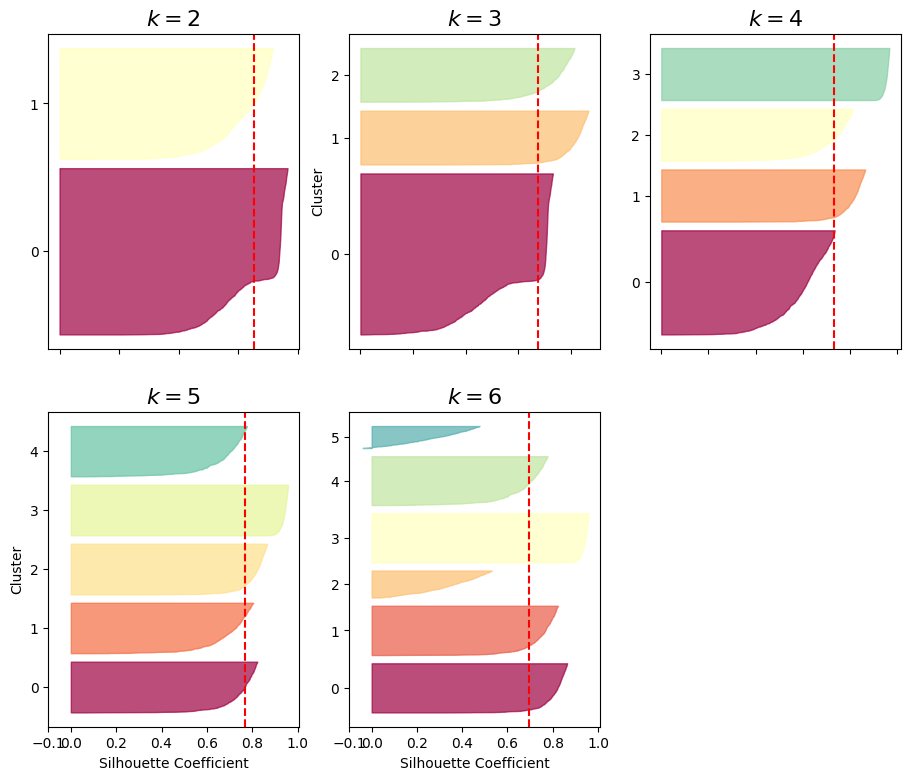

In [ ]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

# Crea una figura de matplotlib con un tamaño de 11x9 pulgadas
plt.figure(figsize=(11, 9))

# Ajuste de modelos KMeans para el rango de 2 a 6 clusters
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_train) for k in range(2, 7)]

# Iteración sobre el rango de clusters (de 2 a 6)
for k in range(2, 7):
    # Ajuste del subplot para 2 filas y 3 columnas, en la posición k-1
    plt.subplot(2, 3, k - 1)

    # Obtiene las etiquetas de cluster del modelo KMeans correspondiente
    y_pred = kmeans_per_k[k - 2].labels_
    # Calcula los coeficientes de silhouette para cada muestra
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X_train) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        # Rellena el área entre los coeficientes de silhouette para cada cluster
        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs, facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    # Configuración de los ejes y etiquetas
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    # Dibuja una línea vertical en la posición del coeficiente de silhouette promedio para k clusters
    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    # Establece el título del subplot
    plt.title("$k={}$".format(k), fontsize=16)

# Muestra la figura
plt.show()



In [ ]:
from sklearn.cluster import KMeans

# Número de clusters para el aprendizaje activo
k = 50

# Inicializar el modelo de clustering K-Means
kmeans = KMeans(n_clusters=k, random_state=42)


In [ ]:
# Calcular las distancias a los centroides y obtener ejemplos representativos
X_train_values = X_train_n.values  # Convertir el DataFrame de entrenamiento normalizado a un array numpy
X_train_dist = kmeans.fit_transform(X_train_values)  # Calcular las distancias a los centroides
idxs = np.argmin(X_train_dist, axis=0)  # Obtener los índices de los ejemplos más cercanos a cada centroide
X_representative_examples = X_train_values[idxs]  # Obtener los ejemplos representativos

# Imprimir la forma de los ejemplos representativos
print("Forma de los ejemplos representativos:", X_representative_examples.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Forma de los ejemplos representativos: (50, 784)


In [ ]:
from sklearn.linear_model import LogisticRegression

# Inicializar un modelo de regresión logística
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)

# Obtener las etiquetas correspondientes a los ejemplos representativos
y_train_values = y_train.values
y_representative_examples = y_train_values[idxs]

# Entrenar el modelo de regresión logística con los ejemplos representativos y sus etiquetas
log_reg.fit(X_representative_examples, y_representative_examples)


LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score

# Predecir las etiquetas para el conjunto de prueba utilizando el modelo entrenado
y_pred_test = log_reg.predict(X_test_n.values)

# Calcular la precisión del modelo en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred_test)
print("Precisión del modelo en el conjunto de prueba:", accuracy)


Precisión del modelo en el conjunto de prueba: 0.6661


In [ ]:
# Obtener las probabilidades de predicción para los ejemplos en el conjunto de prueba (ya lo hicimos con y_pred_test)
probas = log_reg.predict_proba(X_test_n.values)

# Seleccionar ejemplos inciertos basados en las probabilidades de predicción
labels_ixs = np.argmax(probas, axis=1)
labels = np.array([proba[ix] for proba, ix in zip(probas, labels_ixs)])
sorted_ixs = np.argsort(labels) #ordenar de menor a mayor probabilidad
X_lowest = X_test_n.values[sorted_ixs[:k]]
y_lowest = y_test.values[sorted_ixs[:k]]

# Actualizar las etiquetas de los ejemplos inciertos en el conjunto de prueba
y_test_active = y_test.copy()
y_test_active[sorted_ixs[:k]] = y_lowest

# Entrenar un nuevo modelo de regresión logística con las etiquetas actualizadas en el conjunto de prueba
log_reg_active = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg_active.fit(X_test_n, y_test_active)

# Evaluar la precisión del modelo de aprendizaje activo en el conjunto de prueba
accuracy_active = log_reg_active.score(X_test_n, y_test)
print(f"Precisión del modelo de aprendizaje activo (1ra repetición): {accuracy_active:.4f}")

Precisión del modelo de aprendizaje activo (1ra repetición): 0.9063
